## 1. Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

## Load Dataset

In [2]:
train_df = pd.read_csv("/kaggle/input/titanic/train.csv")
test_df = pd.read_csv("/kaggle/input/titanic/test.csv")

## 2. Exploratory Data Analysis (EDA)

In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train_df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Values missings

In [6]:
missing_df = train_df.isnull().sum()

print(missing_df)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


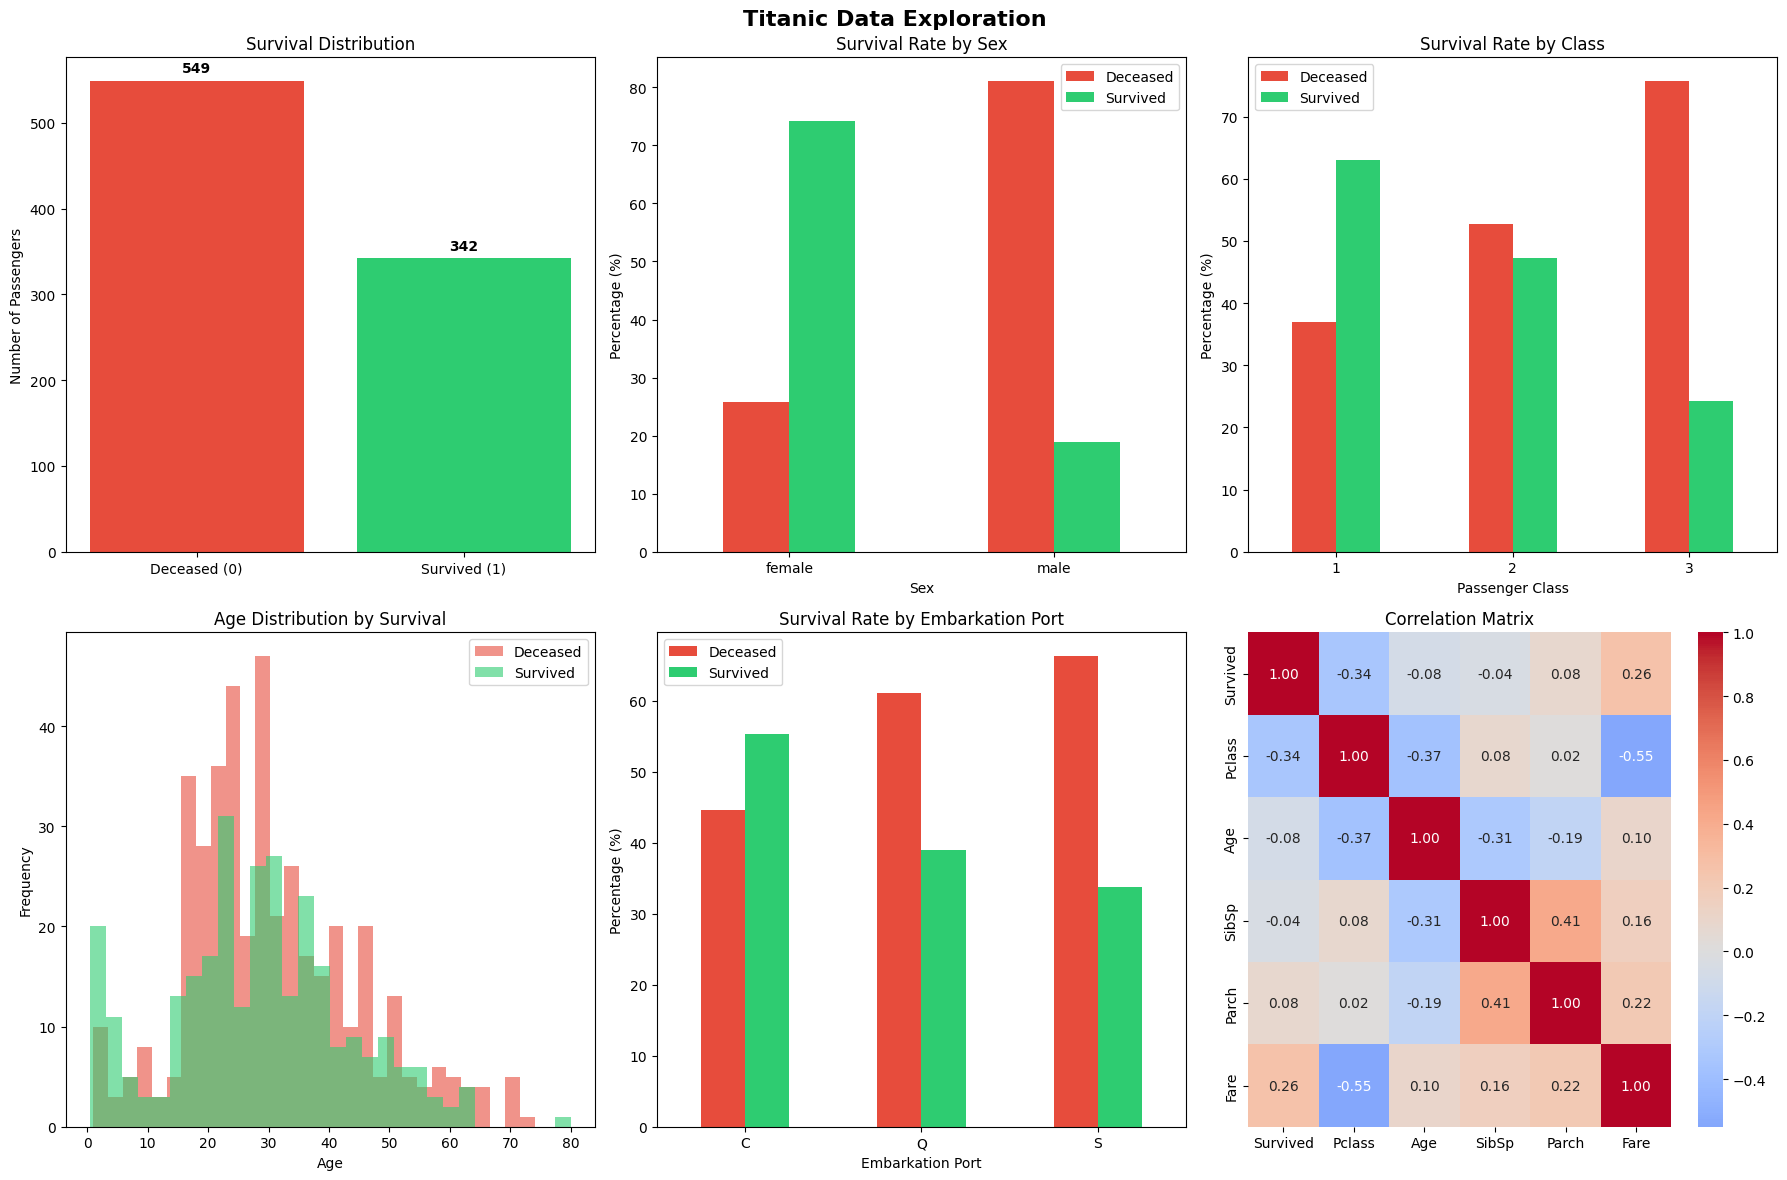

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Titanic Data Exploration', fontsize=16, fontweight='bold')

# 1. Survival Distribution
ax1 = axes[0, 0]
survived_counts = train_df['Survived'].value_counts()
ax1.bar(['Deceased (0)', 'Survived (1)'], survived_counts.values, color=['#e74c3c', '#2ecc71'])
ax1.set_ylabel('Number of Passengers')
ax1.set_title('Survival Distribution')

for i, v in enumerate(survived_counts.values):
    ax1.text(i, v + 10, str(v), ha='center', fontweight='bold')

# 2. Survival by Sex
ax2 = axes[0, 1]
sex_survival = pd.crosstab(train_df['Sex'], train_df['Survived'], normalize='index') * 100
sex_survival.plot(kind='bar', ax=ax2, color=['#e74c3c', '#2ecc71'], rot=0)
ax2.set_ylabel('Percentage (%)')
ax2.set_title('Survival Rate by Sex')
ax2.legend(['Deceased', 'Survived'])

# 3. Survival by Class
ax3 = axes[0, 2]
pclass_survival = pd.crosstab(train_df['Pclass'], train_df['Survived'], normalize='index') * 100
pclass_survival.plot(kind='bar', ax=ax3, color=['#e74c3c', '#2ecc71'], rot=0)
ax3.set_xlabel('Passenger Class')
ax3.set_ylabel('Percentage (%)')
ax3.set_title('Survival Rate by Class')
ax3.legend(['Deceased', 'Survived'])

# 4. Age Distribution by Survival
ax4 = axes[1, 0]
ax4.hist(train_df[train_df['Survived'] == 0]['Age'].dropna(), bins=30, alpha=0.6, label='Deceased', color='#e74c3c')
ax4.hist(train_df[train_df['Survived'] == 1]['Age'].dropna(), bins=30, alpha=0.6, label='Survived', color='#2ecc71')
ax4.set_xlabel('Age')
ax4.set_ylabel('Frequency')
ax4.set_title('Age Distribution by Survival')
ax4.legend()

# 5. Survival by Embarkation Port
ax5 = axes[1, 1]
embarked_survival = pd.crosstab(train_df['Embarked'], train_df['Survived'], normalize='index') * 100
embarked_survival.plot(kind='bar', ax=ax5, color=['#e74c3c', '#2ecc71'], rot=0)
ax5.set_xlabel('Embarkation Port')
ax5.set_ylabel('Percentage (%)')
ax5.set_title('Survival Rate by Embarkation Port')
ax5.legend(['Deceased', 'Survived'])

# 6. Correlation Heatmap
ax6 = axes[1, 2]
corr_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
corr_matrix = train_df[corr_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, ax=ax6)
ax6.set_title('Correlation Matrix')

plt.tight_layout()
plt.savefig('titanic_eda.png', dpi=300, bbox_inches='tight')
plt.show()


### 3. Data Cleaning & Feature Engineering


In [8]:
def preprocess_data(df, is_train=True):
    data = df.copy()
    
    # --- Extract Title from Name ---
    print("→ Extracting title from Name...")
    data['Title'] = data['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    
    # Group rare titles
    title_mapping = {
        'Mr': 'Mr', 'Miss': 'Miss', 'Mrs': 'Mrs', 'Master': 'Master',
        'Dr': 'Rare', 'Rev': 'Rare', 'Col': 'Rare', 'Major': 'Rare',
        'Mlle': 'Miss', 'Countess': 'Rare', 'Ms': 'Miss', 'Lady': 'Rare',
        'Jonkheer': 'Rare', 'Don': 'Rare', 'Dona': 'Rare', 'Mme': 'Mrs',
        'Capt': 'Rare', 'Sir': 'Rare'
    }
    data['Title'] = data['Title'].map(title_mapping)
    data['Title'].fillna('Rare', inplace=True)
    
    # --- Impute Age by median based on Pclass and Sex ---
    print("→ Imputing Age using median grouped by Pclass and Sex...")
    for pclass in [1, 2, 3]:
        for sex in ['male', 'female']:
            mask = (data['Pclass'] == pclass) & (data['Sex'] == sex)
            median_age = data[mask]['Age'].median()
            data.loc[mask & data['Age'].isnull(), 'Age'] = median_age
    
    # --- Impute Embarked with mode ---
    print("→ Imputing Embarked with mode...")
    if data['Embarked'].isnull().sum() > 0:
        mode_embarked = data['Embarked'].mode()[0]
        data['Embarked'].fillna(mode_embarked, inplace=True)
    
    # --- Impute Fare (for test set) ---
    if data['Fare'].isnull().sum() > 0:
        print("→ Imputing Fare with median...")
        median_fare = data['Fare'].median()
        data['Fare'].fillna(median_fare, inplace=True)
    
    # --- Create FamilySize ---
    print("→ Creating FamilySize feature...")
    data['FamilySize'] = data['SibSp'] + data['Parch'] + 1
    
    # --- Create IsAlone ---
    print("→ Creating IsAlone feature...")
    data['IsAlone'] = (data['FamilySize'] == 1).astype(int)
    
    # --- Create AgeGroup categories ---
    print("→ Creating AgeGroup categories...")
    data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 12, 18, 35, 60, 100], 
                               labels=['Child', 'Teen', 'Adult', 'Senior', 'Elderly'])
    
    # --- Encode Sex as binary ---
    print("→ Encoding Sex as binary...")
    data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
    
    # --- Encode Title numerically ---
    print("→ Encoding Title numerically...")
    title_num_mapping = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5}
    data['Title_Num'] = data['Title'].map(title_num_mapping)
    
    # --- One-hot encode Embarked ---
    print("→ One-hot encoding Embarked...")
    embarked_dummies = pd.get_dummies(data['Embarked'], prefix='Embarked')
    data = pd.concat([data, embarked_dummies], axis=1)
    
    # --- One-hot encode AgeGroup ---
    print("→ One-hot encoding AgeGroup...")
    agegroup_dummies = pd.get_dummies(data['AgeGroup'], prefix='AgeGroup')
    data = pd.concat([data, agegroup_dummies], axis=1)
    
    # --- Drop unused columns ---
    print("→ Dropping unused columns...")
    cols_to_drop = ['Name', 'Ticket', 'Cabin', 'Embarked', 'Title', 'AgeGroup']
    data.drop(columns=cols_to_drop, inplace=True, errors='ignore')
    
    print(f"✓ Preprocessing complete. Final shape: {data.shape}\n")
    
    return data


In [9]:
# Application du preprocessing
train_processed = preprocess_data(train_df, is_train=True)
test_processed = preprocess_data(test_df, is_train=False)

# Vérification des valeurs manquantes après preprocessing
print("--- Valeurs manquantes après preprocessing (train) ---")
print(train_processed.isnull().sum().sum(), "valeurs manquantes")

print("\n--- Aperçu des données transformées ---")
print(train_processed.head())

→ Extracting title from Name...
→ Imputing Age using median grouped by Pclass and Sex...
→ Imputing Embarked with mode...
→ Creating FamilySize feature...
→ Creating IsAlone feature...
→ Creating AgeGroup categories...
→ Encoding Sex as binary...
→ Encoding Title numerically...
→ One-hot encoding Embarked...
→ One-hot encoding AgeGroup...
→ Dropping unused columns...
✓ Preprocessing complete. Final shape: (891, 19)

→ Extracting title from Name...
→ Imputing Age using median grouped by Pclass and Sex...
→ Imputing Embarked with mode...
→ Imputing Fare with median...
→ Creating FamilySize feature...
→ Creating IsAlone feature...
→ Creating AgeGroup categories...
→ Encoding Sex as binary...
→ Encoding Title numerically...
→ One-hot encoding Embarked...
→ One-hot encoding AgeGroup...
→ Dropping unused columns...
✓ Preprocessing complete. Final shape: (418, 18)

--- Valeurs manquantes après preprocessing (train) ---
0 valeurs manquantes

--- Aperçu des données transformées ---
   Passenger

### 4. Model Training and Evaluation


In [10]:
print("\n" + "=" * 60)
print("ENTRAÎNEMENT ET ÉVALUATION DU MODÈLE")
print("=" * 60)

# Séparation des features et de la cible
X = train_processed.drop(['PassengerId', 'Survived'], axis=1)
y = train_processed['Survived']



ENTRAÎNEMENT ET ÉVALUATION DU MODÈLE


In [11]:

# Split train/validation
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\n✓ Données séparées:")
print(f"  - Train: {X_train.shape[0]} échantillons")
print(f"  - Validation: {X_val.shape[0]} échantillons")
print(f"  - Features: {X_train.shape[1]}")


✓ Données séparées:
  - Train: 712 échantillons
  - Validation: 179 échantillons
  - Features: 17


### Model 1 : Logistic regression

In [12]:
# --- Modèle 1: Logistic Regression ---
print("\n--- Modèle 1: Logistic Regression ---")
lr_model = LogisticRegression(max_iter=1000, random_state=42)
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_val)
accuracy_lr = accuracy_score(y_val, y_pred_lr)
print(f"Accuracy sur validation: {accuracy_lr:.4f} ({accuracy_lr*100:.2f}%)")

print("\nRapport de classification:")
print(classification_report(y_val, y_pred_lr, target_names=['Décédé', 'Survécu']))



--- Modèle 1: Logistic Regression ---
Accuracy sur validation: 0.8268 (82.68%)

Rapport de classification:
              precision    recall  f1-score   support

      Décédé       0.84      0.89      0.86       110
     Survécu       0.81      0.72      0.76        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.82       179



### Model 2 : Random Forest

In [13]:
# --- Modèle 2: Random Forest ---
print("\n--- Modèle 2: Random Forest ---")
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42
)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_val)
accuracy_rf = accuracy_score(y_val, y_pred_rf)
print(f"Accuracy sur validation: {accuracy_rf:.4f} ({accuracy_rf*100:.2f}%)")

print("\nRapport de classification:")
print(classification_report(y_val, y_pred_rf, target_names=['Décédé', 'Survécu']))


--- Modèle 2: Random Forest ---
Accuracy sur validation: 0.8101 (81.01%)

Rapport de classification:
              precision    recall  f1-score   support

      Décédé       0.81      0.90      0.85       110
     Survécu       0.81      0.67      0.73        69

    accuracy                           0.81       179
   macro avg       0.81      0.78      0.79       179
weighted avg       0.81      0.81      0.81       179



### Plot

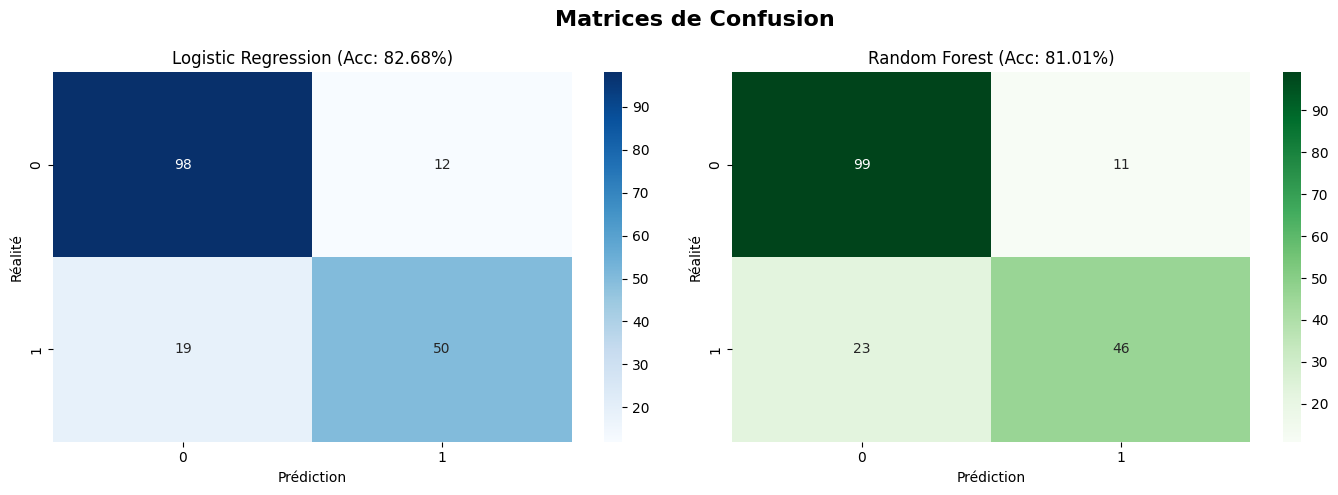

In [14]:
# Matrice de confusion
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
fig.suptitle('Matrices de Confusion', fontsize=16, fontweight='bold')

# Logistic Regression
cm_lr = confusion_matrix(y_val, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title(f'Logistic Regression (Acc: {accuracy_lr:.2%})')
axes[0].set_xlabel('Prédiction')
axes[0].set_ylabel('Réalité')

# Random Forest
cm_rf = confusion_matrix(y_val, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title(f'Random Forest (Acc: {accuracy_rf:.2%})')
axes[1].set_xlabel('Prédiction')
axes[1].set_ylabel('Réalité')

plt.tight_layout()
plt.savefig('confusion_matrices.png', dpi=300, bbox_inches='tight')
plt.show()

### Feature Importance (Random Forest)



--- Importance des Features (Random Forest) ---
       Feature  Importance
8    Title_Num    0.217554
1          Sex    0.198668
5         Fare    0.176112
2          Age    0.111156
0       Pclass    0.105452
6   FamilySize    0.053025
3        SibSp    0.030962
4        Parch    0.019282
11  Embarked_S    0.018992
9   Embarked_C    0.011692


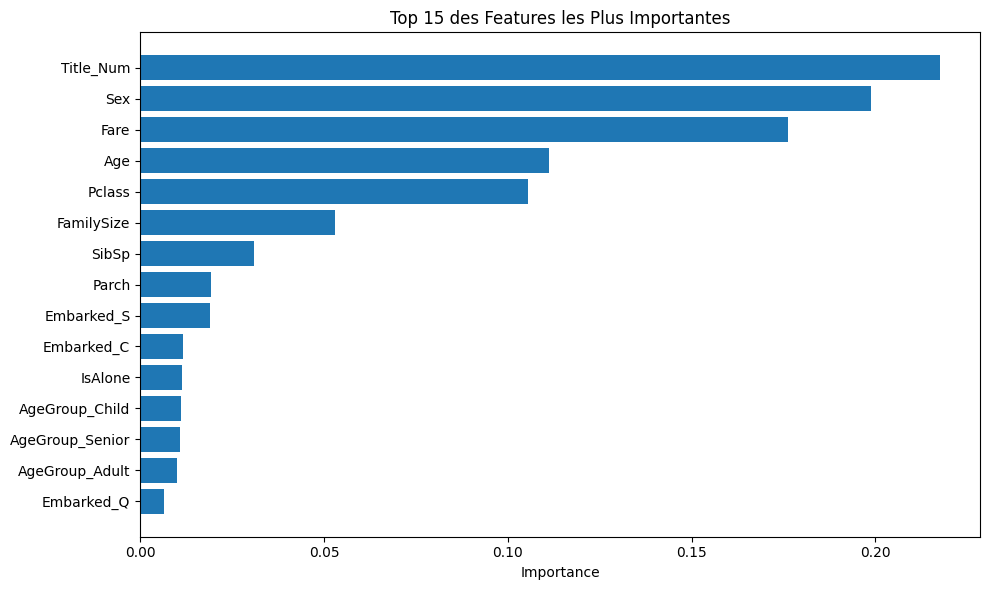

In [15]:
# Feature Importance (Random Forest)
print("\n--- Importance des Features (Random Forest) ---")
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance.head(10))

# Visualisation des importances
plt.figure(figsize=(10, 6))
top_features = feature_importance.head(15)
plt.barh(range(len(top_features)), top_features['Importance'].values)
plt.yticks(range(len(top_features)), top_features['Feature'].values)
plt.xlabel('Importance')
plt.title('Top 15 des Features les Plus Importantes')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
plt.show()

### Selection of the better model

In [16]:
# Sélection du meilleur modèle
best_model = rf_model if accuracy_rf > accuracy_lr else lr_model
best_model_name = "Random Forest" if accuracy_rf > accuracy_lr else "Logistic Regression"
best_accuracy = max(accuracy_rf, accuracy_lr)

print(f"\n✓ Meilleur modèle: {best_model_name} (Accuracy: {best_accuracy:.4f})")



✓ Meilleur modèle: Logistic Regression (Accuracy: 0.8268)


### 5. Create Submission File

In [17]:
# Entraînement du modèle final sur toutes les données d'entraînement
best_model.fit(X, y)

# Préparation des données de test
X_test = test_processed.drop(['PassengerId'], axis=1, errors='ignore')

# Vérification que les colonnes sont identiques
print(f"\n→ Vérification des colonnes...")
print(f"  - Train features: {X.shape[1]} colonnes")
print(f"  - Test features: {X_test.shape[1]} colonnes")

# Alignement des colonnes (au cas où)
X_test = X_test.reindex(columns=X.columns, fill_value=0)

# Prédiction sur le set de test
print("\n→ Prédiction sur les données de test...")
predictions = best_model.predict(X_test)

# Création du fichier de soumission
submission = pd.DataFrame({
    'PassengerId': test_processed['PassengerId'],
    'Survived': predictions
})

# Sauvegarde
submission.to_csv('submission.csv', index=False)

print(f"\n✓ Fichier de soumission créé: submission.csv")
print(f"  - Nombre de prédictions: {len(submission)}")
print(f"  - Taux de survie prédit: {predictions.mean():.2%}")

print("\n--- Aperçu du fichier de soumission ---")
print(submission.head(10))


→ Vérification des colonnes...
  - Train features: 17 colonnes
  - Test features: 17 colonnes

→ Prédiction sur les données de test...

✓ Fichier de soumission créé: submission.csv
  - Nombre de prédictions: 418
  - Taux de survie prédit: 39.23%

--- Aperçu du fichier de soumission ---
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1
5          897         0
6          898         1
7          899         0
8          900         1
9          901         0


In [18]:
from IPython.display import FileLink
FileLink('submission.csv')


/kaggle/working/submission.csv